## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

### Мосалев Максим Сергеевич ИАД-7

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [227]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
print(X.shape)
X.head(8)

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [101]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [102]:
pd.DataFrame(y).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       178 non-null    int32
dtypes: int32(1)
memory usage: 840.0 bytes


Как видно из выводов, пропущенных значений нет (178 из 178 is non-null) и категориальных переменных в данных тоже нет (у всех признаков тип float64, у таргета int32).

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [228]:
from sklearn.model_selection import train_test_split
np.random.seed(10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)

С параметром stratify=y обучающая и тестовая выборки будут иметь те же пропорции меток классов, что и входной набор данных. Это важно, так как модель должна иметь равные возможность для изучения каждого из представленных классов и их тестирования.

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [229]:
X_real_norm_np = StandardScaler().fit_transform(X)
X = pd.DataFrame(data=X_real_norm_np) #масштабируем признаки 

nn = [1, 3, 5, 10, 15, 25]
acc_tr = []
acc_tst = []
X_train_alc_magn = X_train[['alcohol', 'magnesium']] #выберем необходимые признаки 
X_test_alc_magn = X_test[['alcohol', 'magnesium']] 

#обучим шесть классификаторов
clf1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean').fit(X_train_alc_magn, y_train)
clf2 = KNeighborsClassifier(n_neighbors=3, metric='euclidean').fit(X_train_alc_magn, y_train)
clf3 = KNeighborsClassifier(n_neighbors=5, metric='euclidean').fit(X_train_alc_magn, y_train)
clf4 = KNeighborsClassifier(n_neighbors=10, metric='euclidean').fit(X_train_alc_magn, y_train)
clf5 = KNeighborsClassifier(n_neighbors=15, metric='euclidean').fit(X_train_alc_magn, y_train)
clf6 = KNeighborsClassifier(n_neighbors=25, metric='euclidean').fit(X_train_alc_magn, y_train)

n = [clf1, clf2, clf3, clf4, clf5, clf6]

#Выведем долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора в виде DataFrame
for cl in n:
    y_predicted = cl.predict(X_train_alc_magn)
    accuracy_train = np.mean(y_predicted == y_train)
    acc_tr.append(accuracy_train)
    
    y_predicted = cl.predict(X_test_alc_magn)
    accuracy_test = np.mean(y_predicted == y_test)
    acc_tst.append(accuracy_test)
res = [nn, acc_tr, acc_tst]
results = pd.DataFrame(res).transpose()
results.columns= ['NN', 'Train', 'Test']
results

,NN,Train,Test
0,1.0,1.000000,0.518519
1,3.0,0.717742,0.537037
2,5.0,0.733871,0.666667
3,10.0,0.637097,0.685185
4,15.0,0.588710,0.592593
5,25.0,0.532258,0.629630


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [9]:
pip install mlxtend

^C
Note: you may need to restart the kernel to use updated packages.


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [8]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

C:\Users\79061\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\79061\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\79061\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\79061\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\79061\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\79061\anaconda3\lib\site-packages\sklearn\base.py:450: UserWa

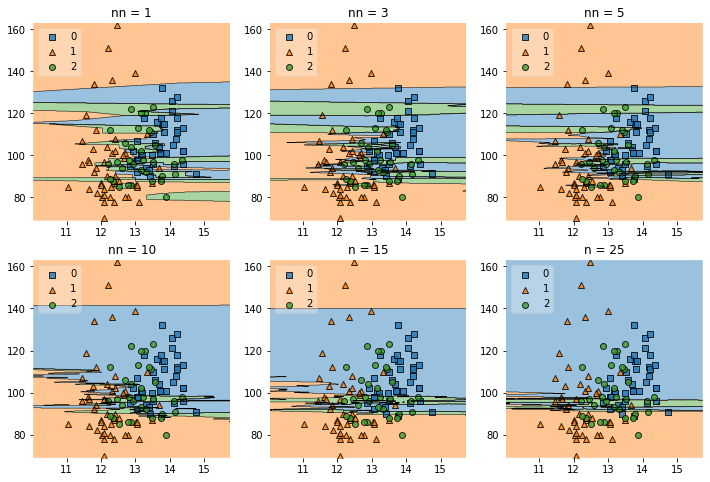

In [235]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(12,8))

labels = ['nn = 1', 'nn = 3', 'nn = 5', 'nn = 10', 'n = 15', 'n = 25']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6],
                         labels,
                         list(itertools.product([0, 1, 2], repeat=2))[:6]):

    clf.fit(X_train_alc_magn, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_alc_magn.to_numpy(), y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

При nn = 1 получаем на обучающей выборке accuracy равной 1,а на тестовой доля правильных ответов самой низкой, так как возникает эффект переобучения и алгоритм просто присваивает любому новому объекту метку класса ближайшего объекта. На визуализации также видим признаки переобучения, все классы в своей области с рваной и сложной геометрией решающих поверхностей.  
При больших значениях параметра (nn=10, 15, 25) в процессе классификации принимает участие слишком много объектов. Такая классификация оказыввается слишком грубой и с низким accuracy.  
Число соседей равной 5 оптимально использовать для обучения классификатора, так как имеем самый высокий accuracy на обучающей выборке и один из самых больших на тестовой. Вдобавок, из визуализации видим, что при nn=5 алгоритм хорошо обобщает и выделяет необходимые правильные области классов.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

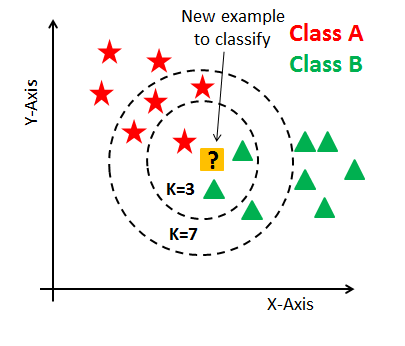

In [236]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def count_distance(self, x, y):
        dist = 0
        for i in range (len(x) - 1):
            dist += (x[i] - y[i]) ** 2
        return np.sqrt(dist)
    
    def predict(self, X):
        target = []
        for i in X:
            distances = [self.count_distance(i, x) for x in self.X]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y[i] for i in k_indices]
            target.append(Counter(k_nearest_labels).most_common(1)[0][0])
        return target

In [237]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all([knn.predict(X_test) == [1, 0]])

In [238]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [5]:
#ячейка для скачивания датасета
import wget 
wget.download('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/eb2cd3de1f0d30edc2fedb958bf67397408dd324/2024/homeworks/hw04_knn_linreg/diamonds.csv')

100% [..........................................................................] 3192560 / 3192560

'diamonds (1).csv'

In [8]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [9]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Пропущенных значений в наборе данных нет. В наборе данных есть бессмысленный столбец - это первый столбец, удалим его.

In [10]:
data = data.drop(columns = ['Unnamed: 0'], axis=1)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [11]:
data.corr(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Больше всего с целевой переменной коррелирует признак carat (0.92), также большая корреляция с признаками отвечающими за размеры: x, y, z (>0.86). 

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [12]:
dataoh = pd.get_dummies(data, drop_first=True)
dataoh

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. 

In [47]:
from sklearn.model_selection import train_test_split
np.random.seed(3)
X_train, X_test, y_train, y_test = train_test_split(dataoh.drop(columns='price', axis=1), dataoh['price'], test_size = 0.3)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [48]:
X_train_norm = pd.DataFrame(data=StandardScaler().fit_transform(X_train.iloc[:, 0:6]))
X_test_norm = pd.DataFrame(data=StandardScaler().fit_transform(X_test.iloc[:, 0:6]))
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_train_norm = X_train_norm.reset_index(drop=True)
X_test_norm = X_test_norm.reset_index(drop=True)
X_train = pd.concat([X_train_norm, X_train.iloc[:, 6:]], axis=1, sort=False, ignore_index=True)
X_test = pd.concat([X_test_norm, X_test.iloc[:, 6:]], axis=1, sort=False, ignore_index=True)
X_train

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.569612,-0.662210,0.239573,1.526786,1.447936,1.371401,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.161301,-0.102846,-1.096200,0.019909,0.060488,0.032592,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.450851,0.876042,-0.205684,0.492480,0.540423,0.624487,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,-0.963432,0.036995,-0.205684,-1.148143,-1.108809,-1.108919,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1.654047,-0.102846,-1.096200,1.598118,1.605006,1.568699,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37753,1.485177,-0.312607,1.575347,1.455455,1.395580,1.357308,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
37754,-0.140192,-2.130543,0.239573,0.189322,0.156475,-0.080150,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
37755,0.999677,-0.382528,-0.650942,1.125547,1.063988,1.033176,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
37756,-0.140192,-0.102846,-0.205684,0.028826,0.051761,0.032592,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print(f"MSE on train: {mean_squared_error(y_train, lr.predict(X_train))}")
print(f"MSE on test: {mean_squared_error(y_test, lr.predict(X_test))}")

MSE on train: 1274040.7804676802
MSE on test: 1283445.2508656415


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [50]:
lr.coef_

array([ 5382.2431456 ,   -97.46653415,   -69.38096348, -1163.74032235,
          -9.17676278,   -29.2468661 ,   534.05842783,   786.76076074,
         725.292445  ,   688.37185228,  -220.07395459,  -278.53845032,
        -481.24263878,  -985.00668059, -1480.54990163, -2370.46438475,
        5401.46071681,  3704.07310122,  2738.34768069,  4635.29587587,
        4306.97650809,  5036.67845485,  4986.13440598])

Коэффициент переменной carat по модулю на порядок превышают оценки прочих вещественных переменных (5382), также большой коэффициент у параметра x (1163).

**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [51]:
from sklearn.linear_model import Lasso, Ridge
lasso = Lasso(10.0).fit(X_train, y_train)
print("Lasso")
print(f"MSE train: {mean_squared_error(y_train, lasso.predict(X_train))}")
print(f"MSE test: {mean_squared_error(y_test, lasso.predict(X_test))}")
print("Коэффициенты:")
print(lasso.coef_)

ridge = Ridge(10.0).fit(X_train, y_train)
print("\nRidge")
print(f"MSE train: {mean_squared_error(y_train, ridge.predict(X_train))}")
print(f"MSE test: {mean_squared_error(y_test, ridge.predict(X_test))}")
print("Коэффициенты:")
print(ridge.coef_)

Lasso
MSE train: 1510432.358906583
MSE test: 1506551.6309960647
Коэффициенты:
[ 4801.50773319  -160.38918099  -118.16201101  -730.06729024
    -0.           -18.09065819    -0.           159.57285939
    82.31345481    88.04910136     0.            -0.
  -113.02191651  -605.46939438 -1007.7145117  -1781.63925698
  1327.76082938     0.          -803.27127926   845.53089033
   585.6087799   1153.34386857  1168.6278112 ]

Ridge
MSE train: 1278171.9651609107
MSE test: 1285290.694826099
Коэффициенты:
[ 5329.31510733  -100.6219261    -72.30584372 -1121.36060135
    -8.52111643   -32.06030044   561.96955154   819.04000003
   754.51260055   722.87996862  -208.24466791  -266.08423956
  -463.92499955  -967.80776635 -1455.91431974 -2334.67209941
  4805.46433573  3153.58252862  2196.05926503  4075.91810899
  3753.23444398  4463.55717381  4420.24749139]


Веса уменьшились, но не сильно, то есть в данных есть небольшое проявление мультиколлинеарности, однако при хорошо подобраном параметре регуляризации и хорошей изначальной регрессии получим близкие результаты моделей. Например, Ridge регрессия и изначальная имеют почти равные веса и ошибки на данных выборках.

**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

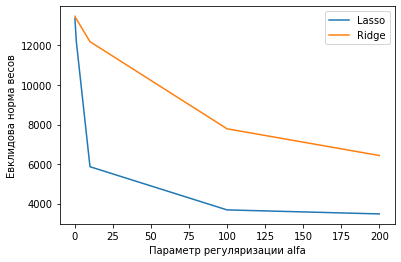

In [52]:
a = [0.1, 1, 10, 100, 200]
en_l = []
en_r = []
for i in a:
    lasso = Lasso(i).fit(X_train, y_train)
    ridge = Ridge(i).fit(X_train, y_train)
    en_l.append(np.linalg.norm(lasso.coef_))
    en_r.append(np.linalg.norm(ridge.coef_))
plt.plot(a, en_l)
plt.plot(a, en_r)
plt.legend(['Lasso', 'Ridge'])
plt.xlabel('Параметр регуляризации alfa')
plt.ylabel('Евклидова норма весов');

Метод Lasso агрессивнее уменьшает веса. Lasso-регрессию часто используют для отбора признаков, так как она способна занулять некоторые коэффициенты, то есть перед какими-то переменными она ставит 0 и в модели они не рассматриваются, таким образом её и используют для отбора признаков.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [53]:
from sklearn.linear_model import LassoCV
alfa = [0.1, 0.5, 0.9, 1, 1.1, 1.2, 10, 100, 200]
lassocv = LassoCV(cv=5, alphas=alfa)
lassocv.fit(X_train, y_train)
alfa_df = pd.DataFrame(lassocv.mse_path_, index=lassocv.alphas_)
print(alfa_df.mean(axis=1))

C:\Users\79061\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 380325796.8880081, tolerance: 48246363.896292835
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\79061\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3634903662.6089706, tolerance: 48246363.896292835
  model = cd_fast.enet_coordinate_descent_gram(


200.0    2.454129e+06
100.0    2.239663e+06
10.0     1.509760e+06
1.2      1.283418e+06
1.1      1.282728e+06
1.0      1.282964e+06
0.9      1.283904e+06
0.5      1.293435e+06
0.1      1.314506e+06
dtype: float64


Из результатов видно, что при параметре а = 1.1 модель дает наибольшее качество.

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [56]:
lasso = Lasso(1.1).fit(X_train, y_train)
lasso.coef_

array([ 5314.55514538,  -107.67641625,   -76.52498647, -1121.36880178,
          -0.        ,   -28.52437648,   422.77477073,   678.72852312,
         616.83301452,   585.41630383,  -161.86150261,  -220.6120831 ,
        -418.33927448,  -921.05894051, -1405.32550737, -2282.26134948,
        4787.59288258,  3135.10547786,  2174.21148992,  4054.66758565,
        3734.79259936,  4444.13972817,  4401.98856649])

Неинформативным оказался признак y - ширина алмаза (coef = 0), также наименее информативным оказался признак z-высота алмаза(-28). Это можно объяснить тем, что большинство алмазов симметричны и имеют близкую к круглой форму, тем более, если посмотреть на датасет, то видно, что в большинстве записей признаки x и y близки по значению, поэтому достаточно знать только один из параметров размера.  
Наиболее информативным оказался признак carat, это логично, так как чем тяжелее алмаз, тем он дороже. Также большие веса имеют параметры, относящиеся к категориальному признаку clarity - прозрачность, чем выше прозрачность, тем больше цена.

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [57]:
print(f"Lasso MSE on test: {mean_squared_error(y_test, lasso.predict(X_test))}")

Lasso MSE on test: 1287062.5287522015


MSE изначальной регрессии на test: 1283445.2508656415

На этих данных получили, что ошибка Lasso регрессии чуть выше обычной регрессии, при этом коэффициенты не сильно уменьшились и почти равны коэффициентам изначальной регрессии, это значит, что в этих данных мультиколлинеарность слабо проявлена и хорошо обученная линейная модель дает такой же результат, что и регуляризованная модель с оптимальным параметром регуляризации.